In [1]:
import os

use_gpu = False
if use_gpu:
    os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import random

import pandas as pd
import cv2
import numpy as np

In [3]:
import Mask_RCNN.model as modellib
from Mask_RCNN.inference_config import inference_config
from Mask_RCNN.bowl_dataset import BowlDataset
import Mask_RCNN.visualize as visualize
import Mask_RCNN.utils as utils

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Configurations:
BACKBONE_SHAPES                [[128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]
 [  8   8]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        512
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_MIN_DIM                  512
IMAGE_PADDING                  True
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               256
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           bowl
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING         

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "model/checkpoint/")
print (MODEL_DIR)

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(MODEL_DIR, "RCNN_checkpoint.h5")
# model_path = model.find_last()[1]

print (model_path)

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

/home/u12162/model/checkpoint/
/home/u12162/model/checkpoint/RCNN_checkpoint.h5
Loading weights from  /home/u12162/model/checkpoint/RCNN_checkpoint.h5


In [7]:
TEST_DIR = './test_2/'

dataset_test = BowlDataset()
dataset_test.load_bowl(TEST_DIR)
dataset_test.prepare()

In [8]:
sample_submission = pd.read_csv('./stage2_sample_submission_final.csv')

./test_2/7c70b6bf8fbce2f4a5f03bc112bf3a78b8ddddd28029a079a1d67d5af77c32ad/images/7c70b6bf8fbce2f4a5f03bc112bf3a78b8ddddd28029a079a1d67d5af77c32ad.png
Processing 1 images
image                    shape: (574, 574, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max:  574.00000


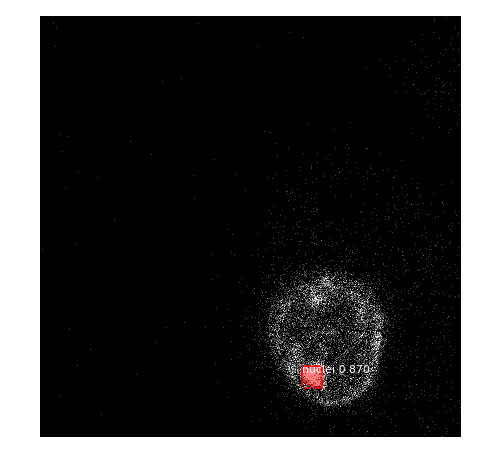

In [9]:
output = []

visualize_all = False

ix = random.randint(0, len(sample_submission.ImageId)-1)
if visualize_all != True:
    visualize_image_ids = sample_submission.ImageId[ix:ix+1]
else:
    visualize_image_ids = sample_submission.ImageId
for image_id in visualize_image_ids:
    image_path = os.path.join(TEST_DIR, image_id, 'images', image_id + '.png')
    print (image_path)
    
    original_image = cv2.imread(image_path)
    results = model.detect([original_image], verbose=1)
    r = results[0]
    visualize.display_instances(original_image, 
                                r['rois'], 
                                r['masks'], 
                                r['class_ids'], 
                                ['', 'nuclei'], 
                                r['scores'], 
                                ax=get_ax())

loading images from: ./test.jpg
Processing 1 images
image                    shape: (446, 593, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  135.10000
image_metas              shape: (1, 10)               min:    0.00000  max:  593.00000


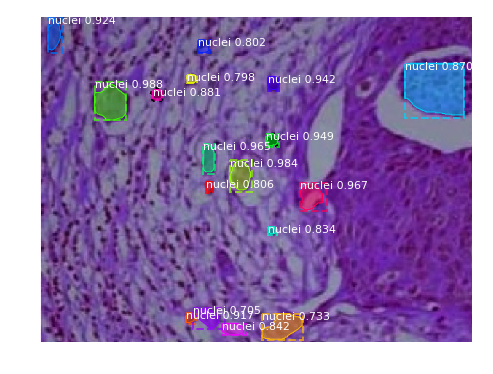

In [10]:
image_path = os.path.join("./test.jpg")
print ("loading images from: " + str(image_path))
    
original_image = cv2.imread(image_path)
results = model.detect([original_image], 
                       verbose=1)
r = results[0]
visualize.display_instances(original_image, 
                            r['rois'], 
                            r['masks'], 
                            r['class_ids'], 
                            ['', 'nuclei'], 
                            r['scores'], 
                            ax=get_ax())